In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_excel('data.xlsx')
df['Sentiment'].unique()

array([ 0., -1.,  1.])

### 1.	Thống kê về tương tác, bao gồm các thông tin về: Bài đăng, Bình luận, Chia sẻ và Re-acts.


In [11]:
df.describe()

,ID,FBId,Sentiment,Reaction,Shares,Comments
count,2.010000e+02,2.020000e+02,202.000000,202.000000,202.000000,202.000000
mean,1.213710e+15,7.159674e+13,0.128713,9.524752,0.252475,6.717822
std,1.752417e+15,1.404144e+14,0.415217,33.599068,1.660372,30.723200
min,0.000000e+00,0.000000e+00,-1.000000,0.000000,0.000000,0.000000
25%,2.211290e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.283474e+14,6.255929e+08,0.000000,0.000000,0.000000,0.000000
75%,1.954842e+15,1.000506e+14,0.000000,8.000000,0.000000,3.000000
max,1.022713e+16,1.731959e+15,1.000000,351.000000,21.000000,402.000000


In [13]:
df.info()
# Có tổng cộng 202 record tương ứng với 202 bài viết

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             201 non-null    float64       
 1   FBId           202 non-null    float64       
 2   Title          98 non-null     object        
 3   Intro          202 non-null    object        
 4   URL            202 non-null    object        
 5   PublishedDate  202 non-null    datetime64[ns]
 6   Sentiment      202 non-null    float64       
 7   Reaction       202 non-null    float64       
 8   Shares         202 non-null    float64       
 9   Comments       202 non-null    float64       
 10  SourceType     202 non-null    object        
 11  SourceName     196 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 19.1+ KB


In [16]:
df['Reaction'].sum()
# Có tổng cộng 1924 reaction

1924.0

In [17]:
df['Shares'].sum()
# Có tổng cộng 51 lượt shares

51.0

In [18]:
df['Comments'].sum()
# Có tổng cộng 1357 lượt comments

1357.0

### 2.	Phân tích nguồn thảo luận. 
●	Báo cáo thể hiện được % thị phần và nội dung trên các nguồn thảo luận.
●	Một số kênh thảo luận phổ biến: Facebook, News, Forum, Youtube… (Dữ liệu trong đề bài này có thể không bao gồm đầy đủ các nguồn thảo luận trên)


In [24]:
df['SourceType'].unique()

array(['Facebook User', 'Forum', 'Facebook', 'Facebook Fanpage', 'News'],
      dtype=object)

In [37]:
SourceTypes = df.groupby('SourceType').count()['ID']
SourceTypes.sum()
SourceType_Percent = SourceTypes/201*100
round(SourceType_Percent,2)
SourceType_Percent

SourceType
Facebook            18.905473
Facebook Fanpage    16.915423
Facebook User       16.915423
Forum                0.995025
News                46.268657
Name: ID, dtype: float64

In [43]:
labels = []
for source_type, percent in SourceTypes.items():
    labels.append(source_type)

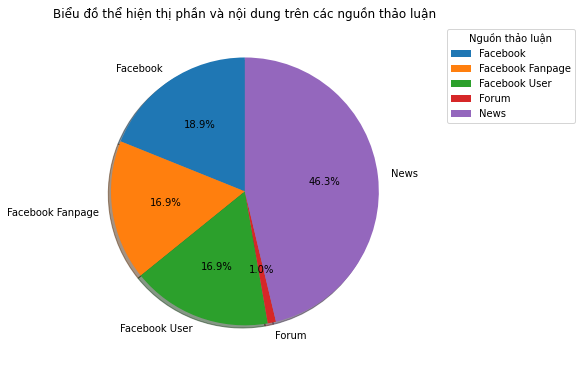

In [85]:

fig1, ax1 = plt.subplots(figsize=(6, 8))

ax1.pie(SourceType_Percent, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(title="Nguồn thảo luận", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1));
ax1.set_title("Biểu đồ thể hiện thị phần và nội dung trên các nguồn thảo luận");

### 3.	Phân tích diễn biến thảo luận theo thời gian. Báo cáo thể hiện được diễn biến thảo luận về thương hiệu trên 2 yếu tố là bài đăng và bình luận.

In [131]:

df['Month'] = df['PublishedDate'].dt.month
df['Day'] = df['PublishedDate'].dt.day
id_count_by_day = df.groupby('Day').count()['ID']

days = []
for day, id_count in id_count_by_day.items():
    days.append(day)
    
id_count_by_day

Day
7     32
8     27
9     19
10    51
11    20
12    34
13    18
Name: ID, dtype: int64

Text(0.5, 1.0, 'Biểu đồ thể hiện số lượng bài viết theo ngày')

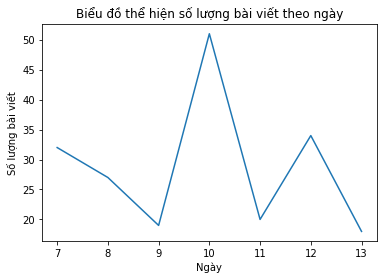

In [117]:
plt.plot(days, id_count_by_day);
plt.ylabel("Số lượng bài viết")
plt.xlabel("Ngày")
plt.title("Biểu đồ thể hiện số lượng bài viết theo ngày")

In [132]:
comments_by_day = df.groupby('Day').sum()['Comments']
comments_by_day
id_count_by_day

Day
7     32
8     27
9     19
10    51
11    20
12    34
13    18
Name: ID, dtype: int64

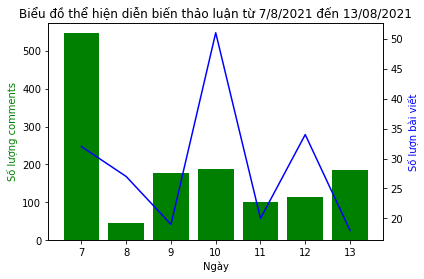

In [155]:
x = days
y1 = comments_by_day
y2 = id_count_by_day
fig, ax1 = plt.subplots()
plt.title('Biểu đồ thể hiện diễn biến thảo luận từ 7/8/2021 đến 13/08/2021')

ax2 = ax1.twinx()
ax1.bar(x, y1, color='green')
ax2.plot(x, y2, color='blue')

ax1.set_xlabel('Ngày')

ax1.set_ylabel('Số lượng comments', color='green')
ax2.set_ylabel('Số lượn bài viết', color='blue');

### 4.	 Phân tích sắc thái thảo luận
●	Báo cáo cần thể hiện được % sắc thái và nội dung trên từng sắc thái thảo luận. 
●	Có 3 loại sắc thái: Tích cực, Trung lập, Tiêu cực (Dữ liệu trong đề bài này có thể không bao gồm đầy đủ cả 3 sắc thái thảo luận trên).
Qua khảo sát tệp dữ liệu ta thấy được các loại sắc thái được biểu diễn qua cột Sentiment:
Tích cực == 1, Trung lập == 0, Tiêu cực == -1

In [138]:
df[df['Sentiment'] == -1]

,ID,FBId,Title,Intro,URL,PublishedDate,Sentiment,Reaction,Shares,Comments,SourceType,SourceName,Month,Day
5,3.098013e+15,1.000212e+14,NaN,Có ai trong đây xài vietnammobile bị trừ tiền ...,https://www.facebook.com/groups/hoididapluon/p...,2021-08-07,-1.0,14.0,0.0,58.0,Facebook User,Nam Văn,8,7
6,1.055843e+15,1.000370e+14,NaN,Mấy anh mấy chi có ai bị bọn vnmb \nNó làm chu...,https://www.facebook.com/groups/vatvostudio/po...,2021-08-09,-1.0,89.0,1.0,42.0,Facebook,Hữu Tân,8,9
8,1.774805e+15,1.000052e+14,NaN,Cái định mệnh Vietnamobile \n\nKhổ chủ Em kiểm...,https://www.facebook.com/100005234354796/posts...,2021-08-11,-1.0,37.0,0.0,28.0,Facebook User,Apple Dũng,8,11
58,2.334706e+15,1.000037e+14,NaN,Cái Vietnamobile cứ như hút máu người ấy \nNạp...,https://www.facebook.com/100003732305409/posts...,2021-08-13,-1.0,10.0,0.0,2.0,Facebook User,Phương Thúy,8,13
59,8.319815e+14,1.000081e+14,NaN,Lần đầu sài sim vnmb nên ko biết tại sao sim m...,https://www.facebook.com/groups/54751842923764...,2021-08-13,-1.0,1.0,0.0,2.0,Facebook User,Mua Dong Khong Lanh,8,13
199,0.000000e+00,0.000000e+00,NaN,Chuyển mạng giữ số Vietnamobile sang Viettel,https://voz.vn/t/chuyen-mang-giu-so-vietnamobi...,2021-08-13,-1.0,1.0,0.0,0.0,Forum,next.voz.vn,8,13


In [146]:
sentiments = df.groupby('Sentiment').count()['ID']
sentiments

Sentiment
-1.0      6
 0.0    163
 1.0     32
Name: ID, dtype: int64

In [150]:
sentiment_percent = sentiments / sentiments.sum() * 100
sentiment_percent
sentiment_status = ['Tiêu cực', 'Trung lập', 'Tích cực']

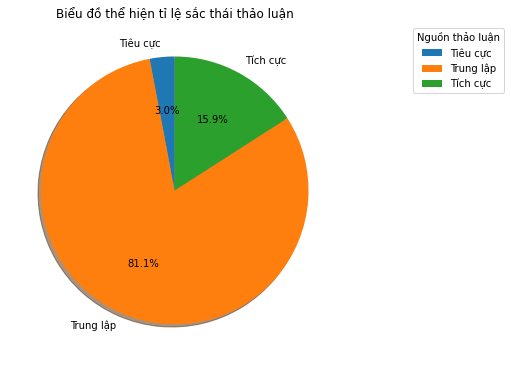

In [156]:

fig1, ax1 = plt.subplots(figsize=(6, 8))

ax1.pie(sentiment_percent, labels=sentiment_status, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(title="Nguồn thảo luận", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1));
ax1.set_title("Biểu đồ thể hiện tỉ lệ sắc thái thảo luận");

In [165]:
df.groupby('Sentiment').sum()

,ID,FBId,Reaction,Shares,Comments,Month,Day
Sentiment,,,,,,,
-1.0,9.095349e+15,5.000752e+14,152.0,1.0,132.0,48,66
0.0,1.170624e+17,9.286930e+15,1332.0,41.0,914.0,1312,1603
1.0,1.177981e+17,4.675536e+15,440.0,9.0,311.0,256,321


In [177]:
df['Reaction'].sort_values(ascending=False)

0      351.0
52     186.0
4      163.0
1      162.0
6       89.0
       ...  
102      0.0
100      0.0
99       0.0
98       0.0
201      0.0
Name: Reaction, Length: 202, dtype: float64